# Introduction:

Se quiere conocer la cantidad de escuelas que existen en distintos barrios de Montevideo, Uruguay y la relacion escuelas/población que hay, se trabajará con el supuesto de que los niños en edad de trabajar se distribuyen de forma similar a la población del barrio.

### Datos

Fuente de datos de población por barrio = https://www.ine.gub.uy/documents/10181/34704/informeMONTEVIDEO.pdf/52135d7b-0465-4db6-b930-c55cf7a50447


Datos de población por barrios utilizados = https://github.com/pablo96molina/IBMDataScience/blob/main/Poblacion%20por%20barrios.xls

In [71]:
import requests # librería para manejar las solicitudes
import pandas as pd # librería para análisis de datos
import numpy as np # librería para manejar datos vectorizados
import random # librería para generar números aleatorios

!pip install geopy
from geopy.geocoders import Nominatim # módulo para convertir una dirección en valores de latitud y longitud 

# librerías para mostrar imágenes 
from IPython.display import Image 
from IPython.core.display import HTML 
    
# librería para convertir un archivo json en un dataframe pandas
from pandas.io.json import json_normalize

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


In [72]:
#Datos de habitantes por barrio
data = pd.read_excel("Poblacion por barrios.xls")
censo = pd.DataFrame(data)
censo

,Barrio,Codigo Barrio,Total,Hombre,Mujer
0,Total,0,1318755,613756,704999
1,Ciudad Vieja,1,12555,5853,6702
2,Centro,2,22120,9562,12558
3,Barrio Sur,3,12639,5794,6845
4,Cordón,4,42456,18517,23939
...,...,...,...,...,...
58,"Colón Sureste, Abayubá",58,13429,6392,7037
59,Colón Centro y Noroeste,59,28849,13553,15296
60,"Lezica, Melilla",60,16030,7856,8174
61,"Villa García, Manga Rural",61,29502,14491,15011


In [73]:
censo.sort_values("Total",ascending = False).head()

,Barrio,Codigo Barrio,Total,Hombre,Mujer
0,Total,0,1318755,613756,704999
8,Pocitos,8,67992,29393,38599
4,Cordón,4,42456,18517,23939
23,Unión,23,39880,18046,21834
37,"La Paloma, Tomkinson",37,37424,18241,19183


In [74]:
#Población del Barrio Cordón
barrio = censo["Barrio"] == "Cordón" 
cordon = censo[barrio]
Total_Cordon = cordon["Total"]
Total_Cordon

4    42456
Name: Total, dtype: int64

In [75]:
barrio = censo["Barrio"] == "Pocitos" 
pocitos = censo[barrio]
Total_Pocitos = pocitos["Total"]
Total_Pocitos

8    67992
Name: Total, dtype: int64

In [76]:
barrio = censo["Barrio"] == "Centro" 
centro = censo[barrio]
Total_Centro = centro["Total"]
Total_Centro

2    22120
Name: Total, dtype: int64

In [77]:
barrio = censo["Barrio"] == "Unión" 
union = censo[barrio]
Total_Union = union["Total"]
Total_Union

23    39880
Name: Total, dtype: int64

In [78]:
#Me conecto a Foursquare

CLIENT_ID = 'M2DA2HFQR0YEEQKV2GLPOXHTPISH3RTP20XRS1U5VV4OLSYN' # su ID de Foursquare
CLIENT_SECRET = 'ZQPJSD30YSX3KX5OHK3RWUJOI5UW3OWWLVSNPDM2MWIG1XPT' # su Secreto de Cliente de Foursquare
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M2DA2HFQR0YEEQKV2GLPOXHTPISH3RTP20XRS1U5VV4OLSYN
CLIENT_SECRET:ZQPJSD30YSX3KX5OHK3RWUJOI5UW3OWWLVSNPDM2MWIG1XPT


In [79]:
#Buscamos la cantidad de escuelas de Cordón
address = 'Cordón, Montevideo, UY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
search_query = 'Escuela'
radius = 1000

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# asignar la parte relevante del JSON a la variable venues
venues = results['response']['venues']

# convertir venues en un dataframe
dataframe = json_normalize(venues)

esc_cordon=dataframe["id"].count()
esc_cordon_perca = esc_cordon/ Total_Cordon

<ipython-input-79-487ce995b2fc>:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


In [80]:
#Buscamos la cantidad de escuelas de Pocitos
address = 'Pocitos, Montevideo, UY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# asignar la parte relevante del JSON a la variable venues
venues = results['response']['venues']

# convertir venues en un dataframe
dataframe = json_normalize(venues)

esc_pocitos=dataframe["id"].count()
esc_pocitos_perca = esc_pocitos/ Total_Pocitos

<ipython-input-80-6be7fd444c64>:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


In [81]:
#Buscamos la cantidad de escuelas en Centro
address = 'Centro, Montevideo, UY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# asignar la parte relevante del JSON a la variable venues
venues = results['response']['venues']

# convertir venues en un dataframe
dataframe = json_normalize(venues)

esc_centro=dataframe["id"].count()
esc_centro_perca = esc_centro/ Total_Centro

<ipython-input-81-68837c1de3a1>:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


In [82]:
#Buscamos la cantidad de escuelas en Unión
address = 'Unión, Montevideo, UY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# asignar la parte relevante del JSON a la variable venues
venues = results['response']['venues']

# convertir venues en un dataframe
dataframe = json_normalize(venues)

esc_union=dataframe["id"].count()
esc_union_perca = esc_union/ Total_Union

<ipython-input-82-3488388ced0e>:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


In [96]:
print(Total_Cordon)
print(Total_Pocitos)
print(Total_Centro)
print(Total_Union)


4    42456
Name: Total, dtype: int64
8    67992
Name: Total, dtype: int64
2    22120
Name: Total, dtype: int64
23    39880
Name: Total, dtype: int64


In [97]:
cant_pob = pd.DataFrame({"Barrio":["Cordon","Pocitos","Centro","Union"], "Población" : [42456,67992,22120,39880]})
cant_pob

,Barrio,Población
0,Cordon,42456
1,Pocitos,67992
2,Centro,22120
3,Union,39880


<BarContainer object of 4 artists>

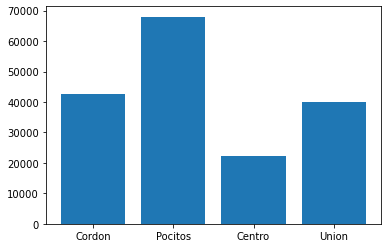

In [98]:
names = cant_pob["Barrio"]
values = cant_pob["Población"]
plt.bar(names, values)

In [83]:
print(esc_cordon)
print(esc_pocitos)
print(esc_centro)
print(esc_union)


30
14
30
8


In [84]:
cant_esc = pd.DataFrame({"Barrio":["Cordon","Pocitos","Centro","Union"], "Escuelas" : [30,14,30,8]})
cant_esc

,Barrio,Escuelas
0,Cordon,30
1,Pocitos,14
2,Centro,30
3,Union,8


<BarContainer object of 4 artists>

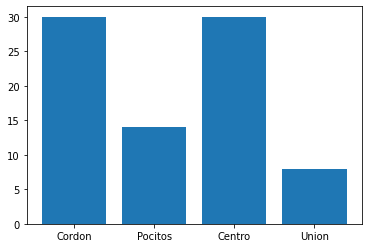

In [95]:
names = cant_esc["Barrio"]
values = cant_esc["Escuelas"]
plt.bar(names, values)

In [99]:
print(esc_cordon_perca)
print(esc_pocitos_perca)
print(esc_centro_perca)
print(esc_union_perca)

4    0.000707
Name: Total, dtype: float64
8    0.000206
Name: Total, dtype: float64
2    0.001356
Name: Total, dtype: float64
23    0.000201
Name: Total, dtype: float64


In [100]:
cant_esc_perca = pd.DataFrame({"Barrio":["Cordon","Pocitos","Centro","Union"], "Escuelas per capita" : [0.000707,0.000206,0.001356,0.000201]})
cant_esc_perca

,Barrio,Escuelas per capita
0,Cordon,0.000707
1,Pocitos,0.000206
2,Centro,0.001356
3,Union,0.000201


<BarContainer object of 4 artists>

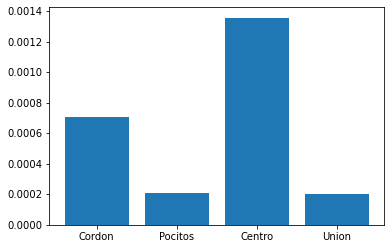

In [102]:
names = cant_esc_perca["Barrio"]
values = cant_esc_perca["Escuelas per capita"]
plt.bar(names, values)